Import required ibraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib
import os

In [ ]:
# Correct way to read the file
import pandas as pd

# Just assign the file path as a string
file_path = '/content/SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [ ]:
print(df.columns.tolist())


['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [ ]:
excel_file = '/content/SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.xlsx'
years = range(2010,2017)

In [ ]:
years[0]

2010

In [ ]:
import pandas as pd

excel_file = "/content/SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.xlsx"
sheet_names = pd.ExcelFile(excel_file).sheet_names
sheet_names


['SupplyChainEmissionFactorsforUS']

In [ ]:
df_1 = pd.read_excel(excel_file, sheet_name='SupplyChainEmissionFactorsforUS')
df_1.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [ ]:
import pandas as pd

# File path
excel_file = "SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.xlsx"  # Update if needed

# Load the sheet
df = pd.read_excel(excel_file, sheet_name='SupplyChainEmissionFactorsforUS')

# Drop unnamed columns (likely empty)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop any accidental header rows
df = df[df["Supply Chain Emission Factors without Margins"] != "Supply Chain Emission Factors without Margins"]

# Add metadata
df["Source"] = "Industry"
df["Year"] = 2015

# Convert numeric columns to float
numeric_cols = [
    "Supply Chain Emission Factors without Margins",
    "Margins of Supply Chain Emission Factors",
    "Supply Chain Emission Factors with Margins"
]
df[numeric_cols] = df[numeric_cols].astype(float)

# Reset index
df.reset_index(drop=True, inplace=True)

# Final DataFrame ready for ML
print(df.head())


  Industry Code                              Industry Name       Substance  \
0         111CA                                      Farms         methane   
1         111CA                                      Farms   nitrous oxide   
2         111CA                                      Farms      other GHGs   
3         113FF  Forestry, fishing, and related activities  carbon dioxide   
4         113FF  Forestry, fishing, and related activities         methane   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2  kg CO2e/2018 USD, purchaser price   
3       kg/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.023   
1                                          0.002   
2                                          0.004   
3                                          0.184   
4                             

In [ ]:
df.columns


Index(['Industry Code', 'Industry Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
df.rename(columns={
    'Industry Code': 'Code',
    'Industry Name': 'Name'
}, inplace=True)


In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    263 non-null    object 
 1   Name                                                    263 non-null    object 
 2   Substance                                               263 non-null    object 
 3   Unit                                                    263 non-null    object 
 4   Supply Chain Emission Factors without Margins           263 non-null    float64
 5   Margins of Supply Chain Emission Factors                263 non-null    float64
 6   Supply Chain Emission Factors with Margins              263 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          263 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,263.0,0.078597,0.264294,0.0,0.0,0.002,0.0395,3.425
Margins of Supply Chain Emission Factors,263.0,0.001897,0.007269,0.0,0.0,0.000,0.0000,0.053
Supply Chain Emission Factors with Margins,263.0,0.080483,0.266251,0.0,0.0,0.002,0.0395,3.425
DQ ReliabilityScore of Factors without Margins,263.0,3.403042,0.556974,2.0,3.0,3.000,4.0000,4.000
DQ TemporalCorrelation of Factors without Margins,263.0,2.000000,0.000000,2.0,2.0,2.000,2.0000,2.000
DQ GeographicalCorrelation of Factors without Margins,263.0,1.000000,0.000000,1.0,1.0,1.000,1.0000,1.000
DQ TechnologicalCorrelation of Factors without Margins,263.0,2.806084,1.252646,1.0,1.0,3.000,4.0000,5.000
DQ DataCollection of Factors without Margins,263.0,1.000000,0.000000,1.0,1.0,1.000,1.0000,1.000
Year,263.0,2015.000000,0.000000,2015.0,2015.0,2015.000,2015.0000,2015.000


In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


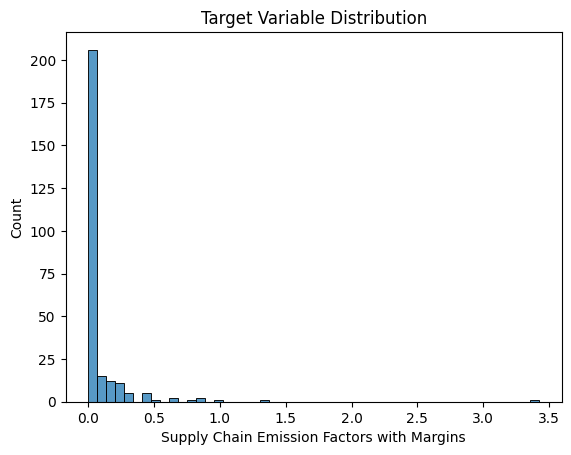

In [ ]:
sns.histplot(df['Supply Chain Emission Factors with Margins'],bins = 50)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
print(df['Substance'].value_counts())

Substance
methane           66
nitrous oxide     66
other GHGs        66
carbon dioxide    65
Name: count, dtype: int64


In [ ]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         197
kg CO2e/2018 USD, purchaser price     66
Name: count, dtype: int64


In [ ]:
print(df['Source'].value_counts())

Source
Industry    263
Name: count, dtype: int64


In [ ]:
df = df.sort_values('Substance').reset_index(drop=True)


In [ ]:
substance_map={'carbon dioxide':0, 'methane':1,'nitrous oxide':2,'other GHGs':3}

In [ ]:
df['Substance']=df['Substance'].map(substance_map)

In [ ]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [ ]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [ ]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [ ]:
df['Unit'] = df['Unit'].map(unit_map)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    263 non-null    object 
 1   Name                                                    263 non-null    object 
 2   Substance                                               263 non-null    int64  
 3   Unit                                                    263 non-null    int64  
 4   Supply Chain Emission Factors without Margins           263 non-null    float64
 5   Margins of Supply Chain Emission Factors                263 non-null    float64
 6   Supply Chain Emission Factors with Margins              263 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          263 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

In [ ]:
df.Code.unique()

array([484, 331, 513, 514, 327, '521CI', 326, 523, 512, 524, 525, 441,
       '532RL', 5411, 323, '5412OP', 322, 325, 5415, 332, '4A0', 445, 339,
       452, 337, 481, 482, '3364OT', 511, 483, 485, 335, 486, '487OS',
       334, 493, 333, '3361MV', 55, 324, 22, 623, 23, 624, 321, '711AS',
       713, 213, 721, 212, 722, 81, 211, 'HS', '113FF', 'ORE', 622,
       '311FT', 42, 562, 621, 561, 61, '315AL', '313TT', '111CA'],
      dtype=object)

In [ ]:
df.Name.unique()

array(['Truck transportation', 'Primary metals',
       'Broadcasting and telecommunications',
       'Data processing, internet publishing, and other information services',
       'Nonmetallic mineral products',
       'Federal Reserve banks, credit intermediation, and related activities',
       'Plastics and rubber products',
       'Securities, commodity contracts, and investments',
       'Motion picture and sound recording industries',
       'Insurance carriers and related activities',
       'Funds, trusts, and other financial vehicles',
       'Motor vehicle and parts dealers',
       'Rental and leasing services and lessors of intangible assets',
       'Legal services', 'Printing and related support activities',
       'Miscellaneous professional, scientific, and technical services',
       'Paper products', 'Chemical products',
       'Computer systems design and related services',
       'Fabricated metal products', 'Other retail',
       'Food and beverage stores', 'Misce

In [ ]:
len(df.Name.unique())

66

In [ ]:
df.drop(columns=['Name','Code','Year'],inplace = True)

In [ ]:
df.shape

(263, 11)

In [ ]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

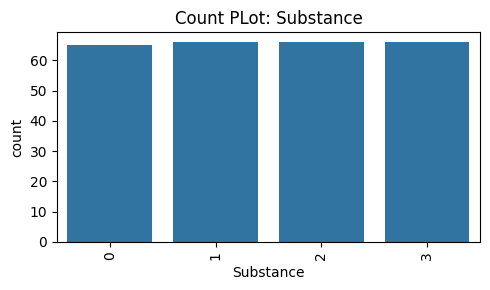

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x=df["Substance"])
plt.title("Count PLot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

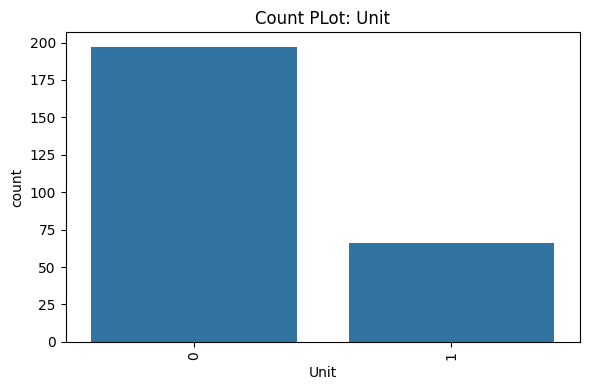

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Unit"])
plt.title("Count PLot: Unit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Set scientific notation format
pd.set_option('display.float_format', '{:.6e}'.format)

# Now display the correlation matrix
df.select_dtypes(include=np.number).corr()


,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
Substance,1.000000e+00,7.747969e-01,-3.804600e-01,-3.513196e-01,-3.871966e-01,3.822978e-01,NaN,NaN,4.543886e-01,NaN
Unit,7.747969e-01,1.000000e+00,-1.567666e-01,-1.513656e-01,-1.597218e-01,2.587088e-01,NaN,NaN,5.597425e-01,NaN
Supply Chain Emission Factors without Margins,-3.804600e-01,-1.567666e-01,1.000000e+00,2.563237e-01,9.996539e-01,-1.668829e-01,NaN,NaN,1.200659e-02,NaN
Margins of Supply Chain Emission Factors,-3.513196e-01,-1.513656e-01,2.563237e-01,1.000000e+00,2.816577e-01,-1.151223e-01,NaN,NaN,9.589029e-02,NaN
Supply Chain Emission Factors with Margins,-3.871966e-01,-1.597218e-01,9.996539e-01,2.816577e-01,1.000000e+00,-1.687422e-01,NaN,NaN,1.451819e-02,NaN
DQ ReliabilityScore of Factors without Margins,3.822978e-01,2.587088e-01,-1.668829e-01,-1.151223e-01,-1.687422e-01,1.000000e+00,NaN,NaN,3.422145e-01,NaN
DQ TemporalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,4.543886e-01,5.597425e-01,1.200659e-02,9.589029e-02,1.451819e-02,3.422145e-01,NaN,NaN,1.000000e+00,NaN
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               263 non-null    int64  
 1   Unit                                                    263 non-null    int64  
 2   Supply Chain Emission Factors without Margins           263 non-null    float64
 3   Margins of Supply Chain Emission Factors                263 non-null    float64
 4   Supply Chain Emission Factors with Margins              263 non-null    float64
 5   DQ ReliabilityScore of Factors without Margins          263 non-null    int64  
 6   DQ TemporalCorrelation of Factors without Margins       263 non-null    int64  
 7   DQ GeographicalCorrelation of Factors without Margins   263 non-null    int64  
 8   DQ TechnologicalCorrelation of Factors w

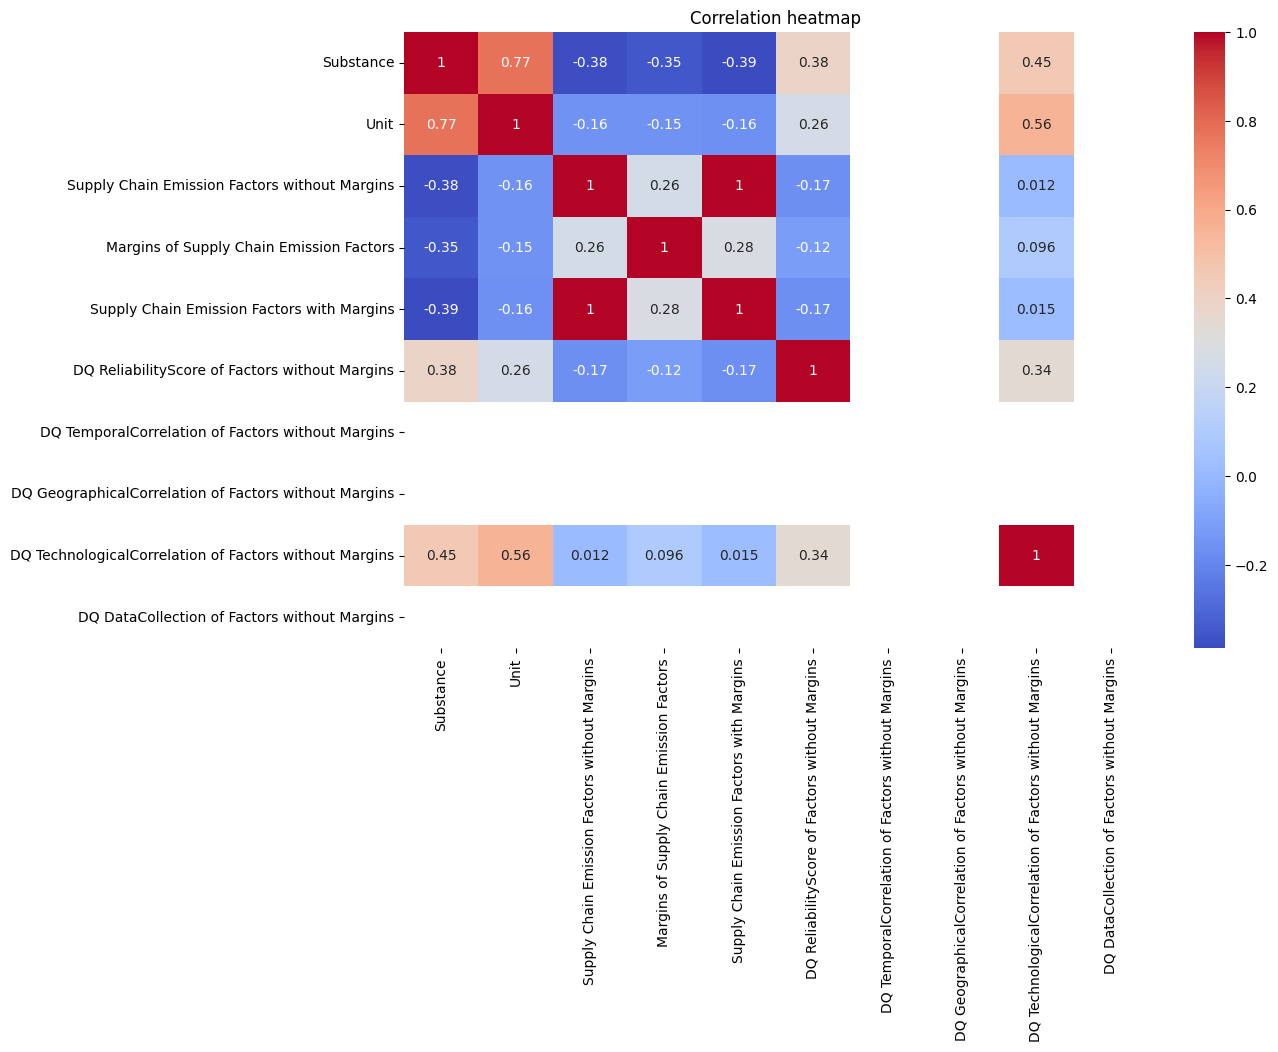

In [ ]:
#correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot = True, cmap= "coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Make a copy of X to avoid modifying the original
X_cleaned = X.copy()

# Encode categorical columns
for col in ['Substance', 'Source']:
    if X_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        X_cleaned[col] = le.fit_transform(X_cleaned[col].astype(str))

# Optional: drop other non-numeric or unhelpful columns (if any)
# X_cleaned.drop(columns=['Name'], inplace=True)  # for example

# Now apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 42)

Select the model for training


In [ ]:
model = RandomForestRegressor(random_state=42)

**Training**

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

Prediction and Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RSME: {rmse}')
print(f'R² Score: {r2}')

RSME: 0.007117133120820595
R² Score: 0.9973220881825722


Hyperparameter Testing

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid (fixed n_estimators=100, max_depth=20)
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2, 5]  # still tuning this
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2'
)

# Fit the model
grid_search.fit(X_scaled, y)

# Output best parameters and R² score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.549044315018457


Use best parameters for prediction

In [68]:
y_pred_best = best_model.predict(X_test)
print("Final RMSE :",np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE : 0.0025317731236851808
Final R²: 0.9996611280169327


In [69]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [70]:
joblib.dump(best_model, 'models/final_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [71]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')